# Lexicon-Based

In [10]:
# Load the annual report text files as corpus
def load_annual_reports(company_folder, base_filename):
    paths = [f"Dataset/Annual Reports txt Files/{company_folder}/{base_filename}{year}.txt" for year in ['20', '21', '22', '23', '24']]
    reports = []
    for path in paths:
        with open(path, "r", encoding="latin-1") as f:
            reports.append(f.read())
    return tuple(reports)

In [11]:
# Usage for Maersk:
maersk20, maersk21, maersk22, maersk23, maersk24 = load_annual_reports("A.P. Moeller Maersk", "maersk")

# Usage for Carlsberg:
carlsberg20, carlsberg21, carlsberg22, carlsberg23, carlsberg24 = load_annual_reports("Carlsberg Group", "carlsberg")

# Usage for Danske Bank:
danske20, danske21, danske22, danske23, danske24 = load_annual_reports("Danske Bank", "danske-bank")

# Usage for Novo Nordisk:
novo20, novo21, novo22, novo23, novo24 = load_annual_reports("Novo Nordisk", "novo")

# Usage for Orsted:
orsted20, orsted21, orsted22, orsted23, orsted24 = load_annual_reports("Orsted", "orsted")

# Usage of DSV:
dsv20, dsv21, dsv22, dsv23, dsv24 = load_annual_reports("DSV", "dsv")

# Usage of Pandora:
pandora20, pandora21, pandora22, pandora23, pandora24 = load_annual_reports("Pandora", "pandora")

# Usage of Danfoss:
danfoss20, danfoss21, danfoss22, danfoss23, danfoss24 = load_annual_reports("Danfoss", "danfoss")

# Usage of Lego:
lego20, lego21, lego22, lego23, lego24 = load_annual_reports("Lego", "lego")

# Usage of Genmab:
genmab20, genmab21, genmab22, genmab23, genmab24 = load_annual_reports("Genmab", "genmab")

# Usage of Nilfisk:
nilfisk20, nilfisk21, nilfisk22, nilfisk23, nilfisk24 = load_annual_reports("Nilfisk", "nilfisk")

# Usage of Salling Group:
salling20, salling21, salling22, salling23, salling24 = load_annual_reports("Salling Group", "salling")

# Usage of BESTSELLER:
bestseller20, bestseller21, bestseller22, bestseller23, bestseller24 = load_annual_reports("Bestseller", "bestseller")

# Usage of Novonesis:
novonesis20, novonesis21, novonesis22, novonesis23, novonesis24 = load_annual_reports("Novonesis", "novonesis")

# Usage of TDC:
tdc20, tdc21, tdc22, tdc23, tdc24 = load_annual_reports("TDC Group", "tdc")

# Usage of Coloplast:
coloplast20, coloplast21, coloplast22, coloplast23, coloplast24 = load_annual_reports("Coloplast", "coloplast")

# Usage of Vestas:
vestas20, vestas21, vestas22, vestas23, vestas24 = load_annual_reports("Vestas", "vestas")

# Usage of Tryg:
tryg20, tryg21, tryg22, tryg23, tryg24 = load_annual_reports("Tryg", "tryg")

# Usage of ISS:
iss20, iss21, iss22, iss23, iss24 = load_annual_reports("ISS", "iss")

# Usage of Jyske Bank:
jyske20, jyske21, jyske22, jyske23, jyske24 = load_annual_reports("Jyske Bank", "jyske")

In [13]:
# Load nltk stopwords
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

sentiment_holding_stopwords = {'above', 'against', 'below', 'but', 'down', 'few', 'further', 'most', 'no', 'nor', 'not', 'off', 'over', 'own', 'too', 'up', 'very'}
stop_words = stop_words - sentiment_holding_stopwords

In [67]:
import spacy
import re
import contractions
import unicodedata
import nltk
import string

#nltk.download("punkt_tab")
#!python -m spacy download en_core_web_sm

In [68]:
class LexiconTextNormalizer:
    def __init__(self):
        self.stopwords = stop_words
        #self.lemmatizer = WordNetLemmatizer()
        #self.stemmer = PorterStemmer()
        #self.wn = nltk.corpus.wordnet
        self.nlp = spacy.load('en_core_web_sm')

    def normalize(self, text, rm_stopwords=True, rm_special_chars=True, expand_cont=True, 
                  case_convert=True, lemmatize=True, stem=False, remove_numbers=True,
                  remove_accented_chars=True, scrub_words=True):
        if not isinstance(text, str):
            raise ValueError("Input text must be a string")
        
        if case_convert:
            text = self.case_convert(text, True)
        else:
            text = self.case_convert(text, False)
        if remove_numbers:
            text = self.remove_numbers(text)
        if expand_cont:
            text = self.expand_contractions(text)
        if remove_accented_chars:
            text = self.remove_accented_chars(text)
        if scrub_words:
            text = self.scrub_words(text)
        if rm_stopwords:
            text = self.remove_stopwords(text)
        if lemmatize:
            text = self.lemmatize_text(text)
        if stem:
            text = self.stem_text(text)
        if rm_special_chars:    
            text = self.remove_special_characters(text)
        
        return text
        
    def case_convert(self, text, lower=True):
        if lower:
            return text.lower()
        else:
            return text.upper()

    def tokenize_text(self, text):
        words = nltk.word_tokenize(text)
        tokens = [word.strip() for word in words]
        return tokens

    def remove_numbers(self, text):
        text = re.sub(r'\d+', '', text)
        return text

    def remove_stopwords(self, text):
        tokens = self.tokenize_text(text)
        filter_tokens  = [token for token in tokens if token not in self.stopwords]
        text= ' '.join(filter_tokens)
        return text

    def remove_special_characters(self, text):
        tokens = self.tokenize_text(text)
        pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
        filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens])
        filtered_text = ' '.join(filtered_tokens)
        return filtered_text
    
    def remove_accented_chars(self, text):
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        return text

    def expand_contractions(self, text):
        return contractions.fix(text)

    def lemmatize_text(self, text):
        doc = self.nlp(text)
        lemmatized = [token.lemma_ for token in doc]
        return ' '.join(lemmatized)
    
    def stem_text(self, text):
        tokens = self.tokenize_text(text)
        stemmed_tokens = [self.stemmer.stem(token) for token in tokens]
        stemmed_text = ' '.join(stemmed_tokens)
        return stemmed_text

    def scrub_words(self, text):
        # Replace \xa0 characters in text
        text = re.sub(r'\xa0', ' ', text)

        # Replace non ascii / not words and digits
        text = re.sub(r"([^\w\d])", ' ', text)

        # Replace new line characters and following text until space
        text = re.sub(r'\n(\w*?)[\s]', '', text)

        # Remove html markup
        text = re.sub(r"<.*?>", ' ', text)

        # Remove extra spaces from the text
        text = re.sub(r"\s+", ' ', text)

        return text

In [69]:
normalizer = LexiconTextNormalizer()

In [70]:
def normalize_reports(company, normalizer):
    for year in ['20', '21', '22', '23', '24']:
        raw_var = f"{company}{year}"
        norm_var = f"{company}{year}_norm"
        corpus_raw = globals()[raw_var]
        globals()[norm_var] = normalizer.normalize(
            corpus_raw,
            rm_stopwords=True, rm_special_chars=True, expand_cont=True,
            case_convert=True, lemmatize=True, stem=False,
            remove_numbers=True, remove_accented_chars=True, scrub_words=True
        )

In [71]:
normalize_reports("maersk", normalizer)
normalize_reports("carlsberg", normalizer)
normalize_reports("danske", normalizer)
normalize_reports("novo", normalizer)
normalize_reports("orsted", normalizer)

normalize_reports("dsv", normalizer)
normalize_reports("pandora", normalizer)
normalize_reports("danfoss", normalizer)
normalize_reports("lego", normalizer)
normalize_reports("genmab", normalizer)

normalize_reports("nilfisk", normalizer)
normalize_reports("salling", normalizer)
normalize_reports("tdc", normalizer)
normalize_reports("bestseller", normalizer)
normalize_reports("novonesis", normalizer)

normalize_reports("coloplast", normalizer)
normalize_reports("vestas", normalizer)
normalize_reports("tryg", normalizer)
normalize_reports("iss", normalizer)
normalize_reports("jyske", normalizer)

In [72]:
companies = ['maersk', 'carlsberg', 'danske', 'novo', 'orsted',
             'dsv', 'pandora', 'danfoss', 'lego', 'genmab',
             'coloplast', 'vestas', 'tryg', 'iss', 'jyske', 
             'nilfisk', 'salling', 'bestseller', 'novonesis', 'tdc']
years = ['20', '21', '22', '23', '24']

for company in companies:
    for year in years:
        norm_var = f"{company}{year}_norm"
        tokens_var = f"{company}{year}_tokens"
        # Use nltk word_tokenize for better handling, or .split() for whitespace tokens
        globals()[tokens_var] = nltk.word_tokenize(globals()[norm_var])

In [74]:
import pandas as pd

In [75]:
loughran_macdonald = pd.read_csv("Wordlist/Loughran-McDonald_MasterDictionary_1993-2024.csv")

In [76]:
def extract_lexicon_features(tokens, lexicon_df):
    lexicon_words = set(lexicon_df['Word']) # Set for quick lookup
    matched_tokens = [tok.upper() for tok in tokens if tok.upper() in lexicon_words] # Only keep tokens present in lexicon
    counts = Counter(matched_tokens)
    
    # Prepare lookups for each feature
    feature_cols = [
        'Positive', 'Negative', 'Uncertainty', 'Litigious', 'Strong_Modal',
        'Weak_Modal', 'Constraining', 'Complexity', 'Syllables'
    ]

    features = {col.lower() + '_score': 0 for col in feature_cols}
    word_count = 0
    complex_word_count = 0
    complex_words = set(lexicon_df[lexicon_df['Complexity'] > 0]['Word']) if 'Complexity' in lexicon_df.columns else set()
    
    for word, cnt in counts.items():
        row = lexicon_df[lexicon_df['Word'] == word]
        if not row.empty:
            for col in feature_cols:
                if col in row:
                    features[col.lower() + '_score'] += int(row.iloc[0][col]) * cnt
            word_count += cnt
            if word in complex_words:
                complex_word_count += cnt
    
    # Compose observation as a dict
    obs = {
        **features,
        'word_count': word_count,
        'complex_word_count': complex_word_count,
        'percentage_of_complex_words': complex_word_count / word_count if word_count > 0 else 0
    }
    return obs

In [79]:
from collections import Counter

In [80]:
obs_rows = []

for company in companies:
    for year in years:
        tokens_var = f"{company}{year}_tokens"
        # Check if variable exists to avoid NameError
        if tokens_var in globals():
            tokens = globals()[tokens_var]
            df_row = extract_lexicon_features(tokens, loughran_macdonald)
            df_row['company_year'] = f"{company}{year}"
            obs_rows.append(df_row)

df = pd.DataFrame(obs_rows)
# Set company_year as first column
df = df[['company_year'] + [col for col in df.columns if col != 'company_year']]
df.tail(10)

,company_year,positive_score,negative_score,uncertainty_score,litigious_score,strong_modal_score,weak_modal_score,constraining_score,complexity_score,syllables_score,word_count,complex_word_count,percentage_of_complex_words
90,novonesis20,62257,28126,10045,2011,4018,8036,4018,4046,1491,693,2,0.002886
91,novonesis21,84367,10045,12054,0,8036,4018,12054,20230,1757,860,10,0.011628
92,novonesis22,100428,12054,6027,2009,0,2009,10045,10115,1960,878,5,0.005695
93,novonesis23,120518,8014,6027,2011,4018,2009,6027,14161,1800,805,7,0.008696
94,novonesis24,40180,4018,2009,2009,0,0,6027,4046,653,298,2,0.006711
95,tdc20,18081,1998,4018,0,0,0,0,0,482,231,0,0.000000
96,tdc21,16072,6016,2009,4018,0,0,2009,2023,616,290,1,0.003448
97,tdc22,28126,1987,2009,0,0,0,6027,0,632,276,0,0.000000
98,tdc23,30113,8025,6027,0,0,0,10045,2023,887,397,1,0.002519
99,tdc24,68284,12043,2009,2009,0,0,10045,2023,1182,506,1,0.001976


In [81]:
df.shape

(100, 13)

In [82]:
df['polarity_score'] = df['positive_score'] - df['negative_score']
for col in ['positive', 'negative', 'uncertainty', 'constraining']:
    df[f'{col}_word_proportion'] = df[f'{col}_score'] / df['word_count'].replace(0, 1)

In [83]:
# add new columns called financial_outlook and fill it with NaNs
df['financial_outlook'] = pd.NA
#  make it the first column
df = df[['financial_outlook'] + [col for col in df.columns if col != 'financial_outlook']]
df.head()

,financial_outlook,company_year,positive_score,negative_score,uncertainty_score,litigious_score,strong_modal_score,weak_modal_score,constraining_score,complexity_score,syllables_score,word_count,complex_word_count,percentage_of_complex_words,polarity_score,positive_word_proportion,negative_word_proportion,uncertainty_word_proportion,constraining_word_proportion
0,<NA>,maersk20,124514,14041,18081,2009,0,10045,18081,30345,2697,1229,15,0.012205,110473,101.313263,11.424736,14.711961,14.711961
1,<NA>,maersk21,82358,28126,10045,6027,2009,6027,20092,14161,2168,975,7,0.007179,54232,84.469744,28.847179,10.302564,20.607179
2,<NA>,maersk22,16072,32144,4018,2009,4018,2009,2009,20230,985,461,10,0.021692,-16072,34.863341,69.726681,8.715835,4.357918
3,<NA>,maersk23,60259,18037,8036,6027,0,4018,10047,20230,1384,618,10,0.016181,42222,97.506472,29.186084,13.003236,16.257282
4,<NA>,maersk24,82369,26095,18081,4018,0,4018,4018,8092,1264,565,4,0.007080,56274,145.785841,46.185841,32.001770,7.111504


In [84]:
# Assign the 2024 outlooks
outlook_2024 = {
    'carlsberg24': 1,
    'orsted24': 0,
    'novo24': 2,
    'maersk24': 1,
    'danske24': 2,
    'dsv24': 1,
    'pandora24': 1,
    'danfoss24': 2,
    'lego24': 1,
    'genmab24': 2,
    'coloplast24': 2,
    'vestas24': 2,
    'tryg24': 2,
    'iss24': 2,
    'jyske24': 2,
    'salling24': 2,
    'nilfisk24': 1,
    'tdc24': 1,
    'bestseller24': 1,
    'novonesis24': 1
}

for company_year, value in outlook_2024.items():
    df.loc[df['company_year'] == company_year, 'financial_outlook'] = value

In [85]:
outlook_2023 = {
    'maersk23': 1,
    'carlsberg23': 2,
    'danske23': 2,
    'novo23': 2,
    'orsted23': 0,
    'dsv23': 1,
    'pandora23': 2,
    'danfoss23': 2,
    'lego23': 2,
    'genmab23': 2,
    'coloplast23': 2,
    'vestas23': 2,
    'tryg23': 2,
    'iss23': 2,
    'jyske23': 2,
    'salling23': 2,
    'nilfisk23': 1,
    'tdc23': 2,
    'bestseller23': 1,
    'novonesis23': 2
}
for company_year, value in outlook_2023.items():
    df.loc[df['company_year'] == company_year, 'financial_outlook'] = value

In [86]:
outlook_2022 = {
    'maersk22': 2,
    'carlsberg22': 2,
    'danske22': 2,
    'novo22': 1,
    'orsted22': 2,
    'dsv22': 2,
    'pandora22': 2,
    'danfoss22': 2,
    'lego22': 2,
    'genmab22': 2,
    'coloplast22': 2,
    'vestas22': 1,
    'tryg22': 2,
    'iss22': 2,
    'jyske22': 2,
    'salling22': 2,
    'nilfisk22': 2,
    'tdc22': 1,
    'bestseller22': 2,
    'novonesis22': 2,
}

# Fill in the values for 2024
for company_year, value in outlook_2022.items():
    df.loc[df['company_year'] == company_year, 'financial_outlook'] = value

In [87]:
outlook_2021 = {
    'maersk21': 2,
    'carlsberg21': 2,
    'danske21': 1,
    'novo21': 2,
    'orsted21': 2,
    'dsv21': 2,
    'pandora21': 2,
    'danfoss21': 2,
    'lego21': 2,
    'genmab21': 2,
    'coloplast21': 2,
    'vestas21': 1,
    'tryg21': 2,
    'iss21': 1,
    'jyske21': 2,
    'salling21': 1,
    'nilfisk21': 1,
    'tdc21': 1,
    'bestseller21': 2,
    'novonesis21': 2
}
# Fill in the values for 2024
for company_year, value in outlook_2021.items():
    df.loc[df['company_year'] == company_year, 'financial_outlook'] = value

In [88]:
outlook_2020 = {
    'maersk20': 2,
    'carlsberg20': 1,
    'danske20': 0,
    'novo20': 2,
    'orsted20': 2,
    'dsv20': 2,
    'pandora20': 1,
    'danfoss20': 1,
    'lego20': 2,
    'genmab20': 2,
    'coloplast20': 2,
    'vestas20': 2,
    'tryg20': 2,
    'iss20': 1,
    'jyske20': 1,
    'salling20': 2,
    'nilfisk20': 0,
    'tdc20': 1,
    'bestseller20': 1,
    'novonesis20': 2
}
# Fill in the values for 2024
for company_year, value in outlook_2020.items():
    df.loc[df['company_year'] == company_year, 'financial_outlook'] = value
df.head()

,financial_outlook,company_year,positive_score,negative_score,uncertainty_score,litigious_score,strong_modal_score,weak_modal_score,constraining_score,complexity_score,syllables_score,word_count,complex_word_count,percentage_of_complex_words,polarity_score,positive_word_proportion,negative_word_proportion,uncertainty_word_proportion,constraining_word_proportion
0,2,maersk20,124514,14041,18081,2009,0,10045,18081,30345,2697,1229,15,0.012205,110473,101.313263,11.424736,14.711961,14.711961
1,2,maersk21,82358,28126,10045,6027,2009,6027,20092,14161,2168,975,7,0.007179,54232,84.469744,28.847179,10.302564,20.607179
2,2,maersk22,16072,32144,4018,2009,4018,2009,2009,20230,985,461,10,0.021692,-16072,34.863341,69.726681,8.715835,4.357918
3,1,maersk23,60259,18037,8036,6027,0,4018,10047,20230,1384,618,10,0.016181,42222,97.506472,29.186084,13.003236,16.257282
4,1,maersk24,82369,26095,18081,4018,0,4018,4018,8092,1264,565,4,0.007080,56274,145.785841,46.185841,32.001770,7.111504


In [89]:
# count how many instances of each financial outlook there are
outlook_counts = df['financial_outlook'].value_counts()
print(outlook_counts)

financial_outlook
2    67
1    29
0     4
Name: count, dtype: int64


### Applying Machine Learning Algorithms

In [96]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold, StratifiedShuffleSplit, GridSearchCV

#!pip install -q xgboost
#!pip install -q imblearn

import xgboost as xgb
from imblearn.over_sampling import ADASYN
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

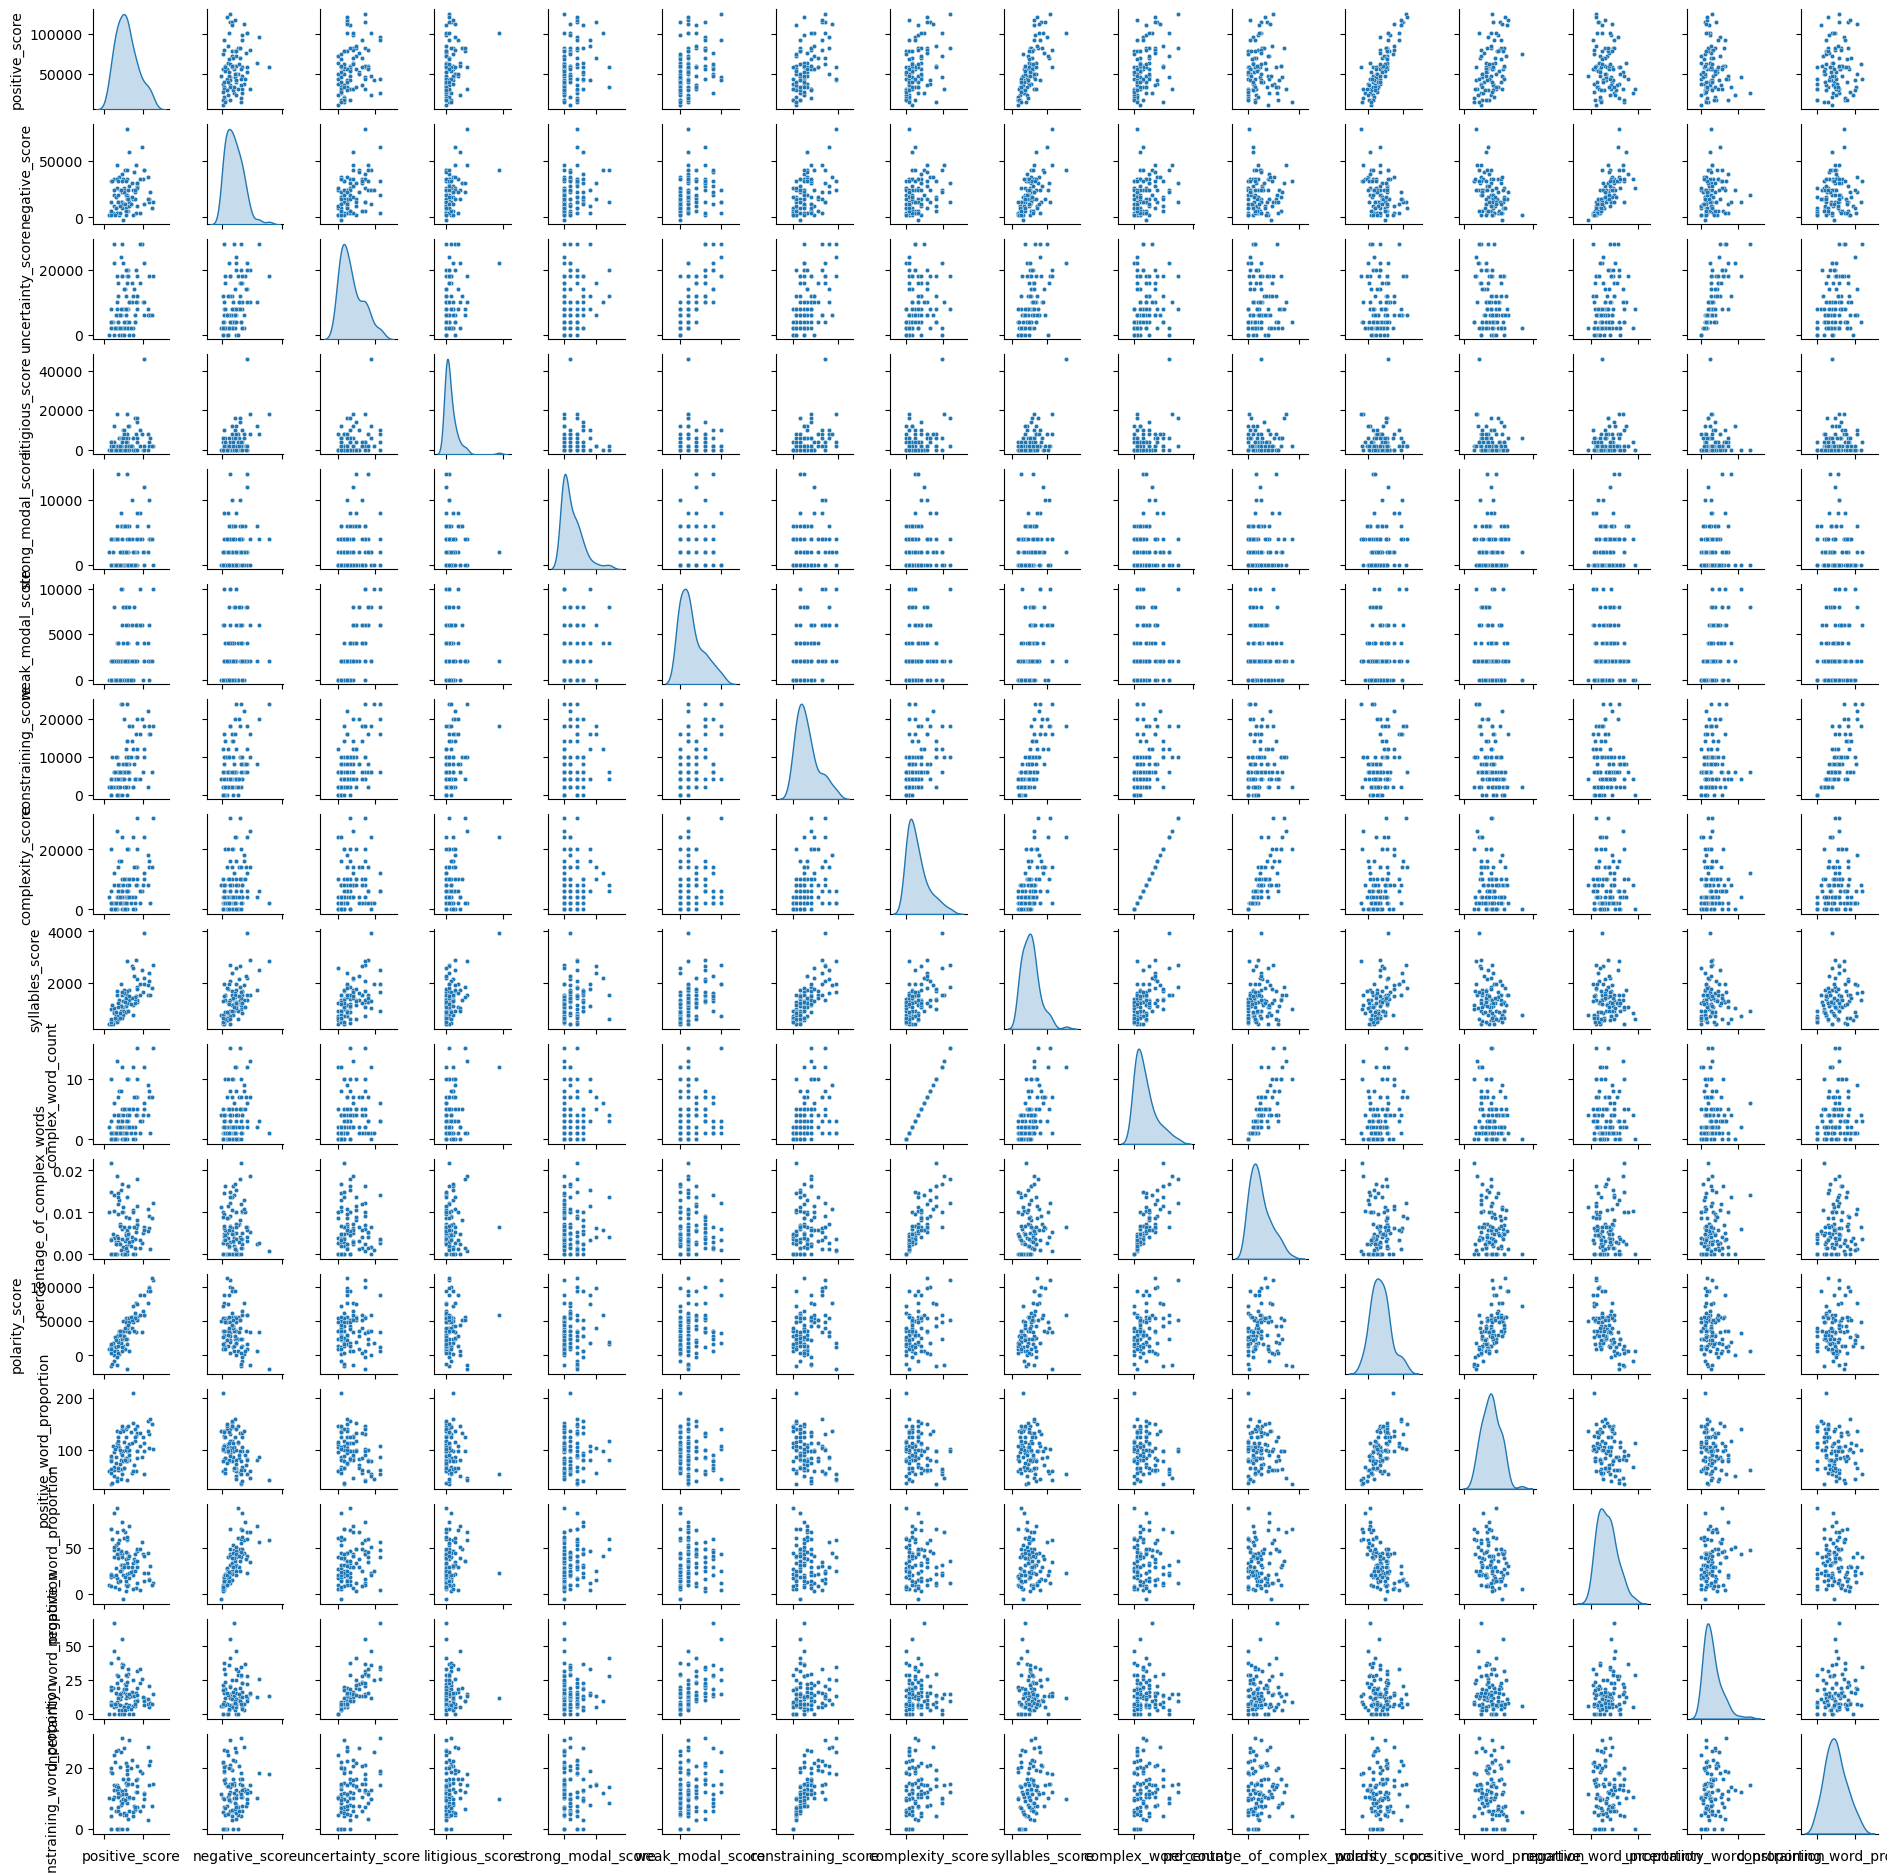

In [97]:
features = [
    u'positive_score', u'negative_score', u'uncertainty_score', u'litigious_score',
    u'strong_modal_score', u'weak_modal_score', u'constraining_score', u'complexity_score',
    u'syllables_score', u'complex_word_count', u'percentage_of_complex_words',
    u'polarity_score', u'positive_word_proportion', u'negative_word_proportion',
    u'uncertainty_word_proportion', u'constraining_word_proportion'
]

# Pairplot over these features for your (shuffled/split) training data
g = sns.pairplot(
    df[features],
    diag_kind="kde",
    plot_kws=dict(s=10),
    diag_kws=dict(fill=True),        
    height=1.2
)
g.set(xticklabels=[])
plt.show()

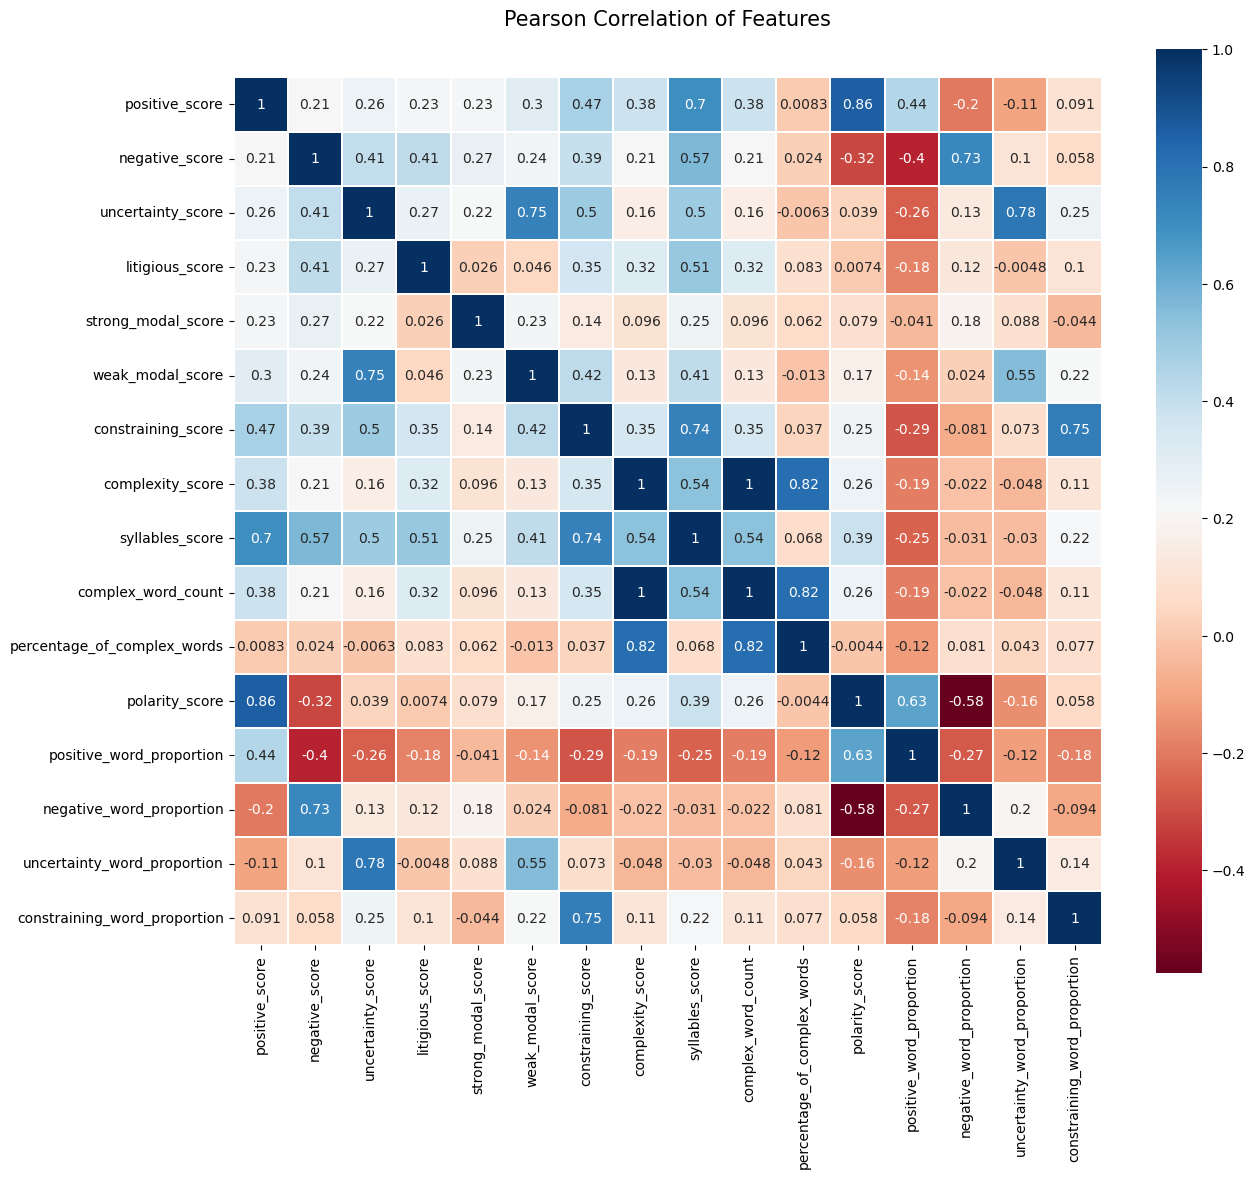

In [98]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(
    df[features].astype(float).corr(),
    linewidths=0.1, vmax=1.0, square=True, cmap=colormap,
    linecolor='white', annot=True
)
plt.show()

#### Handle Class-Imbalance

In [99]:
# Scale the features
scaler = StandardScaler()
X = df[features].dropna()
X_scaled = scaler.fit_transform(X)
y = df['financial_outlook']

print(X_scaled.shape, y.shape)  # Both should be (25, N) and (25,), for example

(100, 16) (100,)


In [100]:
# Check original class distribution
print("Original class distribution:")
print(Counter(y))
print(f"Original dataset shape: {Counter(y)}")

Original class distribution:
Counter({2: 67, 1: 29, 0: 4})
Original dataset shape: Counter({2: 67, 1: 29, 0: 4})


In [101]:
# Check the current state of y
print("Current y values and type:")
print(f"y dtype: {y.dtype}")
print(f"Unique values in y: {y.unique()}")
print(f"Any NaN values: {y.isna().sum()}")

Current y values and type:
y dtype: object
Unique values in y: [2 1 0]
Any NaN values: 0


In [102]:
y_clean = y.astype(int)

In [103]:
# Apply ADASYN to balance the classes
adasyn = ADASYN(random_state=42, n_neighbors=3)  # Using n_neighbors=3 due to small class 0 size

# Fit and transform the training data
X_balanced, y_balanced = adasyn.fit_resample(X_scaled, y_clean)

print("\nAfter ADASYN balancing:")
print(Counter(y_balanced))
print(f"New dataset shape: {X_balanced.shape}")


After ADASYN balancing:
Counter({0: 68, 2: 67, 1: 64})
New dataset shape: (199, 16)


In [104]:
# Shuffle and split into train, val, test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X_balanced, y_balanced, 
    train_size=0.70,  # ~140-150 samples
    random_state=42, 
    shuffle=True, 
    stratify=y_balanced
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.5,  # Split remaining 30% equally: 15% val, 15% test
    random_state=42, 
    shuffle=True, 
    stratify=y_temp
)

# Check sizes
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(139, 16) (30, 16) (30, 16)
(139,) (30,) (30,)


In [106]:
import numpy as np

In [107]:
# Function for plotting curves 

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(0.1,1.0,10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Building Models

#### Logistic Regression

In [108]:
#create an instance and fit the model 
logmodel = LogisticRegression(max_iter=1000, class_weight='balanced')

# Fit the model to the training data
logmodel.fit(X_train, y_train)

# Prediction on the test data 
log_test_pred = logmodel.predict(X_test)
# Print classification report for test set
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, log_test_pred, digits=4))

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0     0.9167    1.0000    0.9565        11
           1     0.5000    0.4444    0.4706         9
           2     0.5000    0.5000    0.5000        10

    accuracy                         0.6667        30
   macro avg     0.6389    0.6481    0.6424        30
weighted avg     0.6528    0.6667    0.6586        30



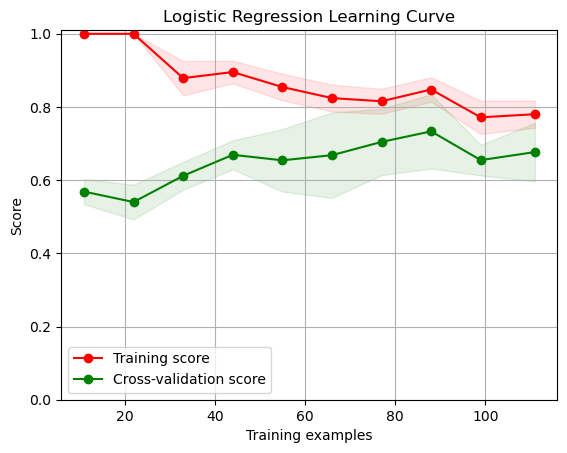

In [109]:
# apply learning curve function
plot_learning_curve(
    logmodel, 
    "Logistic Regression Learning Curve", 
    X_train, y_train, 
    ylim=(0.0, 1.01), 
    cv=StratifiedKFold(n_splits=5), 
    n_jobs=-1
)
plt.show()

#### Gaussian NB

In [116]:
#instantiating a object
clf = GaussianNB()
#fit on train data 
clf.fit(X_train,y_train)


#making prediction on test data 
Naive_predictions = clf.predict(X_test)

# Print classification report for test set
print("Naive Bayes - Classification Report:")
print(classification_report(y_test, Naive_predictions, digits=4))

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0     0.8182    0.8182    0.8182        11
           1     0.3333    0.2222    0.2667         9
           2     0.3077    0.4000    0.3478        10

    accuracy                         0.5000        30
   macro avg     0.4864    0.4801    0.4776        30
weighted avg     0.5026    0.5000    0.4959        30



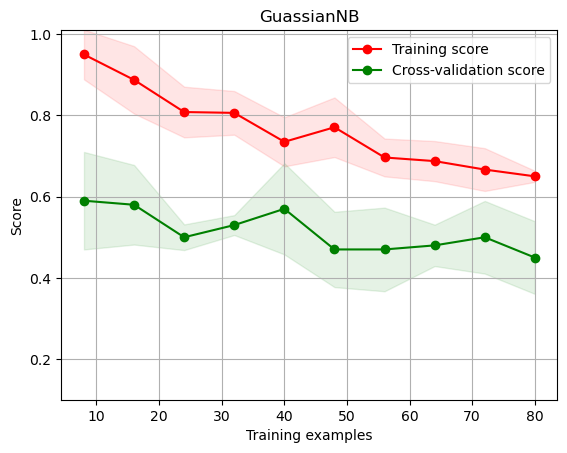

In [111]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
title ='GuassianNB'
estimator = GaussianNB()
plot_learning_curve(estimator, title, X,y.astype(int), ylim=(0.10, 1.01), cv=cv, n_jobs=-1)
plt.show()

#### SGD Classifier

In [117]:
clf = SGDClassifier(loss="log_loss", penalty="l2", max_iter=100, early_stopping=False, random_state=2)
clf.fit(X_train, y_train)

# Prediction on the test data
sgd_test_pred = clf.predict(X_test)
# Print classification report for test set
print("SGD Classifier - Classification Report:")
print(classification_report(y_test, sgd_test_pred, digits=4))

SGD Classifier - Classification Report:
              precision    recall  f1-score   support

           0     0.8462    1.0000    0.9167        11
           1     0.8333    0.5556    0.6667         9
           2     0.6364    0.7000    0.6667        10

    accuracy                         0.7667        30
   macro avg     0.7720    0.7519    0.7500        30
weighted avg     0.7724    0.7667    0.7583        30



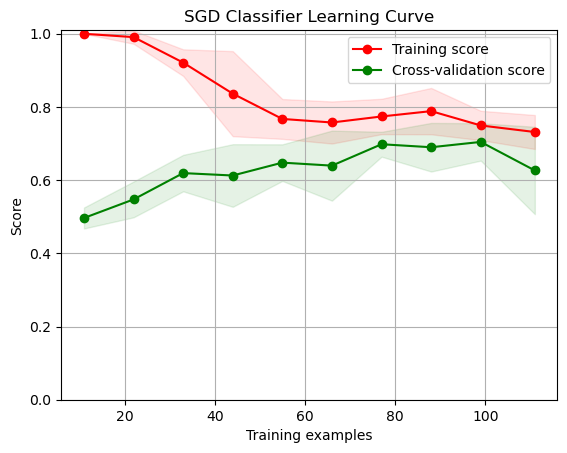

In [113]:
# apply learning curve function to SGD Classifier
plot_learning_curve(
    clf, 
    "SGD Classifier Learning Curve", 
    X_train, y_train, 
    ylim=(0.0, 1.01), 
    cv=StratifiedKFold(n_splits=5), 
    n_jobs=-1
)
plt.show()

#### Support Vector Machine

In [121]:
from sklearn import svm

In [122]:
#Create a svm Classifier
clf = svm.SVC(random_state=42)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svm_grid = {"kernel":['linear','sigmoid', 'rbf','poly'],
            "C":[0.01,0.1,1,10],
            "gamma":['auto'],
            "degree":[0,1,2,3,4,5,6]
            }

svm = GridSearchCV(clf, param_grid=svm_grid, cv=kfold)

#Train the model using the training sets
svm.fit(X_train, y_train)
print(svm.best_params_)

# Prediction on the test data
y_test_pred = svm.predict(X_test)

# Print classification report for test set
print("SVM - Classification Report:")
print(classification_report(y_test, y_test_pred, digits=4))

{'C': 10, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
SVM - Classification Report:
              precision    recall  f1-score   support

           0     0.8462    1.0000    0.9167        11
           1     0.7778    0.7778    0.7778         9
           2     0.7500    0.6000    0.6667        10

    accuracy                         0.8000        30
   macro avg     0.7913    0.7926    0.7870        30
weighted avg     0.7936    0.8000    0.7917        30



#### Random Forrest

In [124]:
clf_rf = RandomForestClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {"n_estimators":[100, 200, 500],
              "criterion":['gini','entropy'],
              "max_depth" : [5,10, 20, None], 
              "max_features" : [4,6,8,12,16],
              "oob_score" :[True]
              }

rf_grid = GridSearchCV(clf_rf, param_grid=param_grid, cv=kfold)

# Train the model using the training sets
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)

# Prediction on the test data
rf_test_pred = rf_grid.predict(X_test)

# Print classification report for test set
print("Random Forest - Classification Report:")
print(classification_report(y_test, rf_test_pred, digits=4))

{'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'n_estimators': 100, 'oob_score': True}
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        11
           1     0.7000    0.7778    0.7368         9
           2     0.7778    0.7000    0.7368        10

    accuracy                         0.8333        30
   macro avg     0.8259    0.8259    0.8246        30
weighted avg     0.8359    0.8333    0.8333        30



#### XGBoost

In [125]:
xgb = xgb.XGBRFClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)

param_grid = {"n_estimators" : [75,100,150],
              "max_depth" : [5,6,7,8],
              "colsample_bytree":[0.7,0.8,0.4,0.5],
              "learning_rate": [0.10,.15,0.02,0.001,0.01,0.1],
              "subsample":[0.8,0.6,0.5],
              "objective" :['binary:logistic']}

xg_grid = GridSearchCV(xgb, param_grid=param_grid, n_jobs=-1, cv=kfold)

# Train the model using the training sets
xg_grid.fit(X_train,y_train)
print(xg_grid.best_params_)

# Prediction on the test data
xg_test_pred = xg_grid.predict(X_test)

# Print classification report for test set
print("XGBoost - Classification Report:")
print(classification_report(y_test, xg_test_pred, digits=4))

{'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150, 'objective': 'binary:logistic', 'subsample': 0.8}
XGBoost - Classification Report:
              precision    recall  f1-score   support

           0     0.9167    1.0000    0.9565        11
           1     0.6667    0.6667    0.6667         9
           2     0.7778    0.7000    0.7368        10

    accuracy                         0.8000        30
   macro avg     0.7870    0.7889    0.7867        30
weighted avg     0.7954    0.8000    0.7963        30



#### Multi Layer Perceptron - Neural Network

In [126]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42, tol=1e-9)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'activation': ['relu', 'tanh'],  
    'hidden_layer_sizes': [(50,), (100,), (50,25)],  
    'max_iter': [500, 1000, 2000, 5000],                     
    'solver': ['adam'],                                 
    'learning_rate_init': [0.001, 0.01, 0.1],           # Control learning rate
    'early_stopping': [True],                           # Stop when not improving
    'validation_fraction': [0.405],                     # For early stopping
    'alpha': [0.00001, 0.0001, 0.001]                   # Regularization
}

mlp_grid = GridSearchCV(mlp, param_grid=param_grid, n_jobs=-1, cv=kfold)
# Train the model using the training sets
mlp_grid.fit(X_train, y_train)
print(mlp_grid.best_params_)

# Prediction on the test data
mlp_test_pred = mlp_grid.predict(X_test)

# Print classification report for test set
print("MLP - Classification Report:")
print(classification_report(y_test, mlp_test_pred, digits=4))

{'activation': 'tanh', 'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (50, 25), 'learning_rate_init': 0.1, 'max_iter': 500, 'solver': 'adam', 'validation_fraction': 0.405}
MLP - Classification Report:
              precision    recall  f1-score   support

           0     0.7857    1.0000    0.8800        11
           1     0.7000    0.7778    0.7368         9
           2     1.0000    0.6000    0.7500        10

    accuracy                         0.8000        30
   macro avg     0.8286    0.7926    0.7889        30
weighted avg     0.8314    0.8000    0.7937        30



# **WARNING:**
## **The results for the PCA used in the report is in a seperate file called lexicon-based.ipynb as they didn't compile the right way when combining the notebooks**
## **Look in the Wordlist folder**

#### Principal Component Analysis

In [127]:
#Using elbow-plot variance/dimensions
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

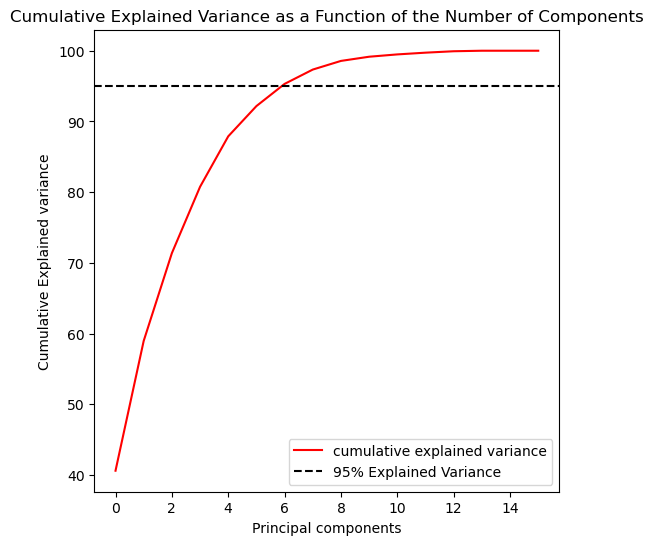

In [128]:
pca = PCA()

# Fit PCA on the training data
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(6,6))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

#### Logistic Regression with PCA

In [132]:
# Create a pipeline with scaling, PCA, and logistic regression
pca_logmodel = Pipeline([
    ('pca', PCA(n_components=3)),                                               
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced')) 
])

# Fit the pipeline to training data
pca_logmodel.fit(X_train, y_train)

# Make predictions
log_test_pred = pca_logmodel.predict(X_test)

# Print classification reports
print("Logistic Regression with PCA - Classification Report:")
print(classification_report(y_test, log_test_pred, digits=4))

Logistic Regression with PCA - Classification Report:
              precision    recall  f1-score   support

           0     0.7857    1.0000    0.8800        11
           1     0.5000    0.4444    0.4706         9
           2     0.6250    0.5000    0.5556        10

    accuracy                         0.6667        30
   macro avg     0.6369    0.6481    0.6354        30
weighted avg     0.6464    0.6667    0.6490        30



#### Gaussian Naïve Bayes with PCA

In [133]:
# Pipeline with parameter tuning
nb_pipeline = Pipeline([
    ('pca', PCA()),
    ('classifier', GaussianNB())
])

# Parameter grid (limited options for Gaussian NB)
param_grid = {
    'pca__n_components': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15,16],
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

nb_grid = GridSearchCV(
    nb_pipeline,
    param_grid,
    cv=5,
    scoring='f1_macro'
)

nb_grid.fit(X_train, y_train)
print("Best parameters:", nb_grid.best_params_)

# Use best model
best_nb = nb_grid.best_estimator_

# Print classification report for test set
print("Naive Bayes with PCA - Test Classification Report:")
print(classification_report(y_test, best_nb.predict(X_test), digits=4))

Best parameters: {'classifier__var_smoothing': 1e-09, 'pca__n_components': 8}
Naive Bayes with PCA - Test Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9091    0.9524        11
           1     0.4545    0.5556    0.5000         9
           2     0.4444    0.4000    0.4211        10

    accuracy                         0.6333        30
   macro avg     0.6330    0.6215    0.6245        30
weighted avg     0.6512    0.6333    0.6396        30



##### SGD Classifier with PCA

In [134]:
# SGD Classifier with PCA
sgd_pipeline = Pipeline([
    ('pca', PCA(n_components=16)),
    ('classifier', SGDClassifier(loss="log_loss", penalty="l2", max_iter=1000))
])

# Fit the pipeline to training data
sgd_pipeline.fit(X_train, y_train)

# Make predictions
sgd_test_pred = sgd_pipeline.predict(X_test)

# Print classification reports
print("SGD Classifier with PCA - Classification Report:")
print(classification_report(y_test, sgd_test_pred, digits=4))

SGD Classifier with PCA - Classification Report:
              precision    recall  f1-score   support

           0     0.9000    0.8182    0.8571        11
           1     0.5556    0.5556    0.5556         9
           2     0.4545    0.5000    0.4762        10

    accuracy                         0.6333        30
   macro avg     0.6367    0.6246    0.6296        30
weighted avg     0.6482    0.6333    0.6397        30



#### Support Vector Machines (SVM) with PCA

In [135]:

# Consider PCA with SVM - test both
svm_pipeline = Pipeline([
    ('pca', PCA(n_components=16)),  # Adjust n_components as needed
    ('classifier', SVC(kernel='rbf', C=10))  #
])

# Fit the pipeline to training data
svm_pipeline.fit(X_train, y_train)

# Make predictions
svm_test_pred = svm_pipeline.predict(X_test)

# Print classification reports
print("SVM with PCA - Test Classification Report:")
print(classification_report(y_test, svm_test_pred, digits=4))

# show amount of PCA components
pca = svm_pipeline.named_steps['pca']
print(f"Number of PCA components: {pca.n_components_}")

SVM with PCA - Test Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        11
           1     0.6000    0.6667    0.6316         9
           2     0.6667    0.6000    0.6316        10

    accuracy                         0.7667        30
   macro avg     0.7556    0.7556    0.7544        30
weighted avg     0.7689    0.7667    0.7667        30

Number of PCA components: 16


#### Random Forrest with PCA

In [136]:
# Consider PCA with Random Forest
rf_pipeline = Pipeline([
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
])

# Fit the pipeline to training data
rf_pipeline.fit(X_train, y_train)
# Make predictions
rf_test_pred = rf_pipeline.predict(X_test)

# print the number of PCA components used
pca = rf_pipeline.named_steps['pca']
print(f"Number of PCA components used in Random Forest: {pca.n_components_}")

# Print classification reports
print("Random Forest with PCA - Classification Report:")
print(classification_report(y_test, rf_test_pred, digits=4))

Number of PCA components used in Random Forest: 16
Random Forest with PCA - Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        11
           1     0.7500    0.6667    0.7059         9
           2     0.7273    0.8000    0.7619        10

    accuracy                         0.8333        30
   macro avg     0.8258    0.8222    0.8226        30
weighted avg     0.8341    0.8333    0.8324        30



#### XGBoost with PCA

In [137]:
from xgboost import XGBClassifier
# Create pipeline
xgb_pipeline = Pipeline([
    ('pca', PCA()),
    ('classifier', XGBClassifier())
])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)

param_grid = {
    "pca__n_components": [5, 6, 7, 8, 9, 10],
    "classifier__n_estimators": [50, 100],
    "classifier__max_depth": [3, 6, 9],
    "classifier__learning_rate": [0.1, 0.01],
    "classifier__subsample": [0.8, 1.0]
}

xg_grid = GridSearchCV(xgb_pipeline, param_grid=param_grid, n_jobs=-1, cv=kfold)

# Train the model using the training sets
xg_grid.fit(X_train, y_train)
print(xg_grid.best_params_)

# Prediction on the test data
xg_test_pred = xg_grid.predict(X_test)

# Print classification report for train and test sets
print("XGBoost - Classification Report:")
print(classification_report(y_test, xg_test_pred, digits=4))

{'classifier__learning_rate': 0.1, 'classifier__max_depth': 9, 'classifier__n_estimators': 50, 'classifier__subsample': 0.8, 'pca__n_components': 9}
XGBoost - Classification Report:
              precision    recall  f1-score   support

           0     0.9167    1.0000    0.9565        11
           1     0.5556    0.5556    0.5556         9
           2     0.5556    0.5000    0.5263        10

    accuracy                         0.7000        30
   macro avg     0.6759    0.6852    0.6795        30
weighted avg     0.6880    0.7000    0.6928        30



#### Multi Layer Perceptron - Neural Netwrok - with PCA

In [138]:
mlp_pipeline = Pipeline([
    ('pca', PCA()),
    ('classifier', MLPClassifier(random_state=42, tol=1e-9))
])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'pca__n_components': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    'classifier__activation': ['relu', 'tanh'],
    'classifier__hidden_layer_sizes': [(50,), (100,), (50,25)],
    'classifier__max_iter': [500, 1000, 2000, 5000],
    'classifier__solver': ['adam'],
    'classifier__learning_rate_init': [0.001, 0.01, 0.1],
    'classifier__early_stopping': [True],
    'classifier__validation_fraction': [0.1],
    'classifier__alpha': [0.00001, 0.0001, 0.001]
}


mlp_grid = GridSearchCV(mlp_pipeline, param_grid=param_grid, n_jobs=-1, cv=kfold)
# Train the model using the training sets
mlp_grid.fit(X_train, y_train)
print(mlp_grid.best_params_)

# Prediction on the test data
mlp_test_pred = mlp_grid.predict(X_test)

# Print classification report for train and test sets
print("MLP - Test Classification Report:")
print(classification_report(y_test, mlp_test_pred, digits=4))

{'classifier__activation': 'relu', 'classifier__alpha': 1e-05, 'classifier__early_stopping': True, 'classifier__hidden_layer_sizes': (50, 25), 'classifier__learning_rate_init': 0.1, 'classifier__max_iter': 500, 'classifier__solver': 'adam', 'classifier__validation_fraction': 0.1, 'pca__n_components': 13}
MLP - Test Classification Report:
              precision    recall  f1-score   support

           0     0.8571    0.5455    0.6667        11
           1     0.6667    0.2222    0.3333         9
           2     0.4000    0.8000    0.5333        10

    accuracy                         0.5333        30
   macro avg     0.6413    0.5226    0.5111        30
weighted avg     0.6476    0.5333    0.5222        30



---

# Vector Embeddings

#### Preprocessing

In [139]:
#!pip install -q spacy contractions nltk

In [140]:
#!python -m spacy download en_core_web_lg

In [141]:
#!pip install numpy==1.26.4

In [142]:
import nltk
#nltk.download('stopwords')

In [146]:
ml_pbfiqa_df = pd.read_csv("Dataset/Cleaned Sentence Data/Cleaned Phrasebank and FiQa.csv")
nn_pbfiqa_df = ml_pbfiqa_df.copy()

In [147]:
ml_ar_df = pd.read_csv("Dataset/Cleaned Sentence Data/Cleaned Annual Reports.csv")
nn_ar_df = ml_ar_df.copy()

In [148]:
import unicodedata
import spacy
import re
import contractions
#from nltk.stem import WordNetLemmatizer

nlp_model = spacy.load('en_core_web_lg') # On UCLoud, change this from 'en_core_web_sm' to 'en_core_web_md' or 'en_core_web_lg' since there's more RAM
#lemmatizer = WordNetLemmatizer()

In [149]:
# Load nltk stopwords
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

sentiment_holding_stopwords = {'above', 'against', 'below', 'but', 'down', 'few', 'further', 'most', 'no', 'nor', 'not', 'off', 'over', 'own', 'too', 'up', 'very'}
stop_words = stop_words - sentiment_holding_stopwords

# Lemmatize stop words
stop_words = set(
    nlp_model(word)[0].lemma_
    for word in stop_words
)

In [150]:
class TextNormalizer:
    """
    Text normalizer class. When passed a string of text, it will normalize the text by:
    1. Expanding contractions.
    2. Removing stopwords.
    3. Lemmatizing the text or stemming the text.
    4. Removing special characters.
    5. Converting the text to lowercase.
    This is done sequentially.
    """
    def __init__(self):
        self.stopwords = stop_words
        #self.lemmatizer = lemmatizer
        self.nlp = nlp_model

    def normalize(self, text, rm_stopwords=True, rm_special_chars=True, expand_cont=True, 
                  case_convert=True, lemmatize=True, remove_numbers=True,
                  remove_accented_chars=True, scrub_words=True, tokenize=True):
        """
        Normalize the text by applying a series of text processing steps.
        rm_stopwords -> Boolean: Removes stopwords from the text.
        rm_special_chars -> Boolean: Removes special characters from the text.
        expand_cont -> Boolean: Expands contractions in the text.
        case_convert -> Boolean: Converts the text to lowercase.
        lemmatize -> Boolean: Lemmatizes the text.
        """
        if not isinstance(text, str):
            raise ValueError("Input text must be a string")
        if expand_cont:
            text = self.expand_contractions(text)
        if remove_accented_chars:
            text = self.remove_accented_chars(text)
        if case_convert:
            text = self.case_convert(text, True)
        else:
            text = self.case_convert(text, False)
        if remove_numbers:
            text = self.remove_numbers(text)
        if scrub_words:
            text = self.scrub_words(text)
        
        if not tokenize:
            return text
        
        doc = self.nlp(text)

        tokens = [token.text for token in doc]

        if lemmatize:
            tokens = [token.lemma_ for token in doc if not token.is_punct]

        if rm_stopwords:
            tokens = [token for token in tokens if token not in self.stopwords]

        if rm_special_chars:
            tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]
            tokens = [token for token in tokens if token]  # Remove empty strings

        return ' '.join(tokens)        
     

    # Define the text processing methods
    def expand_contractions(self, text):
        return contractions.fix(text)
    
    def remove_accented_chars(self, text):
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    def scrub_words(self, text):
        # Replace \xa0 characters in text
        text = re.sub(r'\xa0', ' ', text)
        # Replace non ascii / not words and digits
        text = re.sub(r"([^\w\d])", ' ', text)
        # Replace new line characters and following text until space
        text = re.sub(r'\n(\w*?)[\s]', '', text)
        # Remove html markup
        text = re.sub(r"<.*?>", ' ', text)
        # Remove extra spaces from the text
        text = re.sub(r"\s+", ' ', text)
        return text.strip()

    def case_convert(self, text, lower=True):
        if lower:
            return text.lower()
        else:
            return text.upper()
        
    def remove_numbers(self, text):
        return re.sub(r'\d+', '', text)

In [151]:
ml_normalizer = TextNormalizer()
nn_normalizer = TextNormalizer()

In [152]:
ml_pbfiqa_df['Sentence'] = ml_pbfiqa_df['Sentence'].apply(lambda x: ml_normalizer.normalize(x))
ml_pbfiqa_df.head()

,Sentence,Sentiment
0,geosolution technology leverage benefon gps so...,positive
1,esi low down bk real possibility,negative
2,last quarter componenta net sale double eurm e...,positive
3,accord finnish russian chamber commerce major ...,neutral
4,swedish buyout firm sell remain percent stake ...,neutral


In [153]:
ml_ar_df['Sentence'] = ml_ar_df['Sentence'].apply(lambda x: ml_normalizer.normalize(x))
ml_ar_df.head()

,Sentence,Sentiment
0,global electricity demand project double drive...,positive
1,exact electricity demand depend much electrifi...,neutral
2,future demand meet affordable secure renewable...,neutral
3,renewable industry see substantial build recen...,positive
4,diversify energy portfolio include high share ...,neutral


In [154]:
nn_pbfiqa_df['Sentence'] = nn_pbfiqa_df['Sentence'].apply(lambda x: nn_normalizer.normalize(x, tokenize=False, lemmatize=False, rm_stopwords=False, rm_special_chars=False))
nn_pbfiqa_df.head()

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down to bk a real possibility,negative
2,for the last quarter of componenta s net sales...,positive
3,according to the finnish russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


In [155]:
nn_ar_df['Sentence'] = nn_ar_df['Sentence'].apply(lambda x: nn_normalizer.normalize(x, tokenize=False, lemmatize=False, rm_stopwords=False, rm_special_chars=False))
nn_ar_df.head()

,Sentence,Sentiment
0,global electricity demand is projected to doub...,positive
1,while the exact electricity demand depends on ...,neutral
2,future demand must be met by affordable secure...,neutral
3,the renewables industry has seen substantial b...,positive
4,diversified energy portfolios including a high...,neutral


#### Final clean because two sentences become ""

In [156]:
# Find empty string values in the 'Sentence' column
len(ml_pbfiqa_df[ml_pbfiqa_df['Sentence'].str.strip()==""]), len(ml_ar_df[ml_ar_df['Sentence']==""])

(2, 0)

In [157]:
# Remove empty string values in the 'Sentence' column
ml_pbfiqa_df = ml_pbfiqa_df[ml_pbfiqa_df['Sentence'].str.strip() != '']

In [158]:
# Check again
len(ml_pbfiqa_df[ml_pbfiqa_df['Sentence'].str.strip()==""]), len(ml_ar_df[ml_ar_df['Sentence']==""])

(0, 0)

#### Export to CSV

In [159]:
import os
os.makedirs("Dataset/Preprocessed/", exist_ok=True)

In [160]:
ml_pbfiqa_df.to_csv("Dataset/Preprocessed/ml_pbfiqa.csv", index=False)
ml_ar_df.to_csv("Dataset/Preprocessed/ml_ar.csv", index=False)
nn_pbfiqa_df.to_csv("Dataset/Preprocessed/nn_pbfiqa.csv", index=False)
nn_ar_df.to_csv("Dataset/Preprocessed/nn_ar.csv", index=False)

## Machine Learning Models

In [161]:
#!pip install -q scikit-learn tensorflow
#!pip install -q --upgrade numpy scikit-learn

In [162]:
import pandas as pd
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# -------------------------------
# Step 1: Pre-train on ml_pbfiqa.csv
# -------------------------------
pretrain_df = pd.read_csv("Dataset/Preprocessed/ml_pbfiqa.csv")
X_pretrain = pretrain_df['Sentence']
y_pretrain = pretrain_df['Sentiment']

# -------------------------------
# Step 2: Prepare ar.csv for evaluation
# -------------------------------
ar_df = pd.read_csv("Dataset/Preprocessed/ml_ar.csv")
X_ar = ar_df['Sentence']
y_ar = ar_df['Sentiment']
X_train_ar, X_test_ar, y_train_ar, y_test_ar = train_test_split(X_ar, y_ar, test_size=0.2, random_state=42)

# -------------------------------
# Define Models and Hyperparameters
# -------------------------------
pipelines = {
    "Logistic Regression": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000,
                                  lowercase=False,       # already lowercased
                                  stop_words=None       # already removed
    )),
        ('clf', LogisticRegression(max_iter=1000))
    ]),
    "SVM": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000,
                                  lowercase=False,       # already lowercased
                                  stop_words=None       # already removed
    )),
        ('clf', SVC())
    ]),
    "Naive Bayes": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000,
                                  lowercase=False,       # already lowercased
                                  stop_words=None       # already removed
    )),
        ('clf', MultinomialNB())
    ])
}

param_grids = {
    "Logistic Regression": {
        'tfidf__ngram_range': [(1,1), (1,2)],
        'clf__C': [0.1, 1, 10]
    },
    "SVM": {
        'tfidf__ngram_range': [(1,1), (1,2)],
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf']
    },
    "Naive Bayes": {
        'tfidf__ngram_range': [(1,1), (1,2)],
        'clf__alpha': [0.5, 1.0, 1.5]
    }
}

# -------------------------------
# Train on pretrain_df and fine-tune/test on ar_df
# -------------------------------
for name, pipeline in pipelines.items():
    print(f"\nPre-training {name} on Phrasebank + FiQA...")
    pipeline.fit(X_pretrain, y_pretrain)

    print(f"Fine-tuning {name} on Annual Report training set...")
    grid = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='f1_macro', n_jobs=-1)
    grid.fit(X_train_ar, y_train_ar)

    print(f"Best Params for {name}: {grid.best_params_}")
    print(f"Classification Report on Annual Report test set:")
    y_pred = grid.predict(X_test_ar)

    
    # Save classification report
    report = classification_report(y_test_ar, y_pred, target_names=sorted(y_ar.unique()), digits=4)
    print(report)


Pre-training Logistic Regression on Phrasebank + FiQA...
Fine-tuning Logistic Regression on Annual Report training set...
Best Params for Logistic Regression: {'clf__C': 10, 'tfidf__ngram_range': (1, 2)}
Classification Report on Annual Report test set:
              precision    recall  f1-score   support

    negative     0.8684    0.5593    0.6804        59
     neutral     0.9058    0.9784    0.9407       649
    positive     0.9223    0.8017    0.8578       237

    accuracy                         0.9079       945
   macro avg     0.8989    0.7798    0.8263       945
weighted avg     0.9076    0.9079    0.9037       945


Pre-training SVM on Phrasebank + FiQA...
Fine-tuning SVM on Annual Report training set...
Best Params for SVM: {'clf__C': 10, 'clf__kernel': 'linear', 'tfidf__ngram_range': (1, 2)}
Classification Report on Annual Report test set:
              precision    recall  f1-score   support

    negative     0.8039    0.6949    0.7455        59
     neutral     0.9251  

# Neural Netowrk (LSTM)

In [163]:
# !pip install -q tensorflow=2.16.1 keras_tuner

In [164]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt

import warnings
warnings.filterwarnings("ignore")

# Constants
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 100
PRETRAIN_WEIGHTS_PATH = "pretrained_lstm.weights.h5"

# === Load Pretraining Data ===
pretrain_df = pd.read_csv("Dataset/Preprocessed/nn_pbfiqa.csv")
texts_pretrain = pretrain_df['Sentence'].astype(str)
labels_pretrain = pretrain_df['Sentiment']

label_encoder = LabelEncoder()
labels_pretrain_encoded = label_encoder.fit_transform(labels_pretrain)

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(texts_pretrain)
X_pretrain = pad_sequences(tokenizer.texts_to_sequences(texts_pretrain), maxlen=MAX_SEQUENCE_LENGTH)

# === Define Model Function ===
def build_model(hp=None, load_pretrained=False):
    lstm_units = 64
    dense_units = 64
    dense_dropout = 0.3
    learning_rate = 1e-3

    if hp and not load_pretrained:
        # Only allow tuning if not loading pretrained weights
        dense_units = hp.Int("dense_units", 32, 128, step=32)
        dense_dropout = hp.Float("dense_dropout", 0.1, 0.5, step=0.1)
        learning_rate = float(hp.Choice("learning_rate", [1e-3, 1e-4]))

    model = Sequential()
    model.add(Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH, trainable=True))
    model.add(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2))  # Fixed
    model.add(Dense(units=dense_units, activation='relu'))
    model.add(Dropout(dense_dropout))
    model.add(Dense(len(np.unique(labels_pretrain_encoded)), activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    if load_pretrained:
        model.build(input_shape=(None, MAX_SEQUENCE_LENGTH))
        try:
            model.load_weights(PRETRAIN_WEIGHTS_PATH)
        except Exception as e:
            print("Warning: Couldn't load pretrained weights:", e)

    return model

# === Pretrain ===
print("=== Pretraining ===")
pretrain_model = build_model()
pretrain_model.fit(X_pretrain, labels_pretrain_encoded, epochs=20, batch_size=32, validation_split=0.2,
                   callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])
pretrain_model.save_weights(PRETRAIN_WEIGHTS_PATH)

# === Load Fine-Tuning Data ===
train_df = pd.read_csv("Dataset/Preprocessed/nn_ar.csv")
texts_finetune = train_df['Sentence'].astype(str)
labels_finetune = label_encoder.transform(train_df['Sentiment'])

X_finetune = pad_sequences(tokenizer.texts_to_sequences(texts_finetune), maxlen=MAX_SEQUENCE_LENGTH)
X_train, X_test, y_train, y_test = train_test_split(X_finetune, labels_finetune, test_size=0.2, random_state=42)

# === Fine-tune with Keras Tuner ===
# Phase 1: HYPERPARAMETER TUNING WITHOUT pretrained weights
tuner = kt.RandomSearch(
    lambda hp: build_model(hp, load_pretrained=False),
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='tune_architecture'
)

tuner.search(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
    verbose=1
)

# Phase 2: LOAD BEST HPs and retrain WITH pretrained weights
best_hp = tuner.get_best_hyperparameters(1)[0]
model = build_model(best_hp, load_pretrained=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
    verbose=1
)


# === Evaluate Best Model ===
best_model = tuner.get_best_models(1)[0]
y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print("\n=== Evaluation ===")
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, digits=4)
print(report)

Trial 10 Complete [00h 00m 32s]
val_accuracy: 0.9589946866035461

Best val_accuracy So Far: 0.9735449552536011
Total elapsed time: 00h 08m 57s
Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7020 - loss: 0.7535 - val_accuracy: 0.8214 - val_loss: 0.5152
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8793 - loss: 0.3799 - val_accuracy: 0.9087 - val_loss: 0.2765
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9374 - loss: 0.1982 - val_accuracy: 0.9431 - val_loss: 0.2034
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9717 - loss: 0.0893 - val_accuracy: 0.9497 - val_loss: 0.2149
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9902 - loss: 0.0425 - val_accuracy: 0.9577 - val_loss: 0.1823
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9927 - loss: 0.0340 - val_accuracy: 0.9590 - val_loss: 0.1711
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9948 - loss: 0.0170 - val_accu

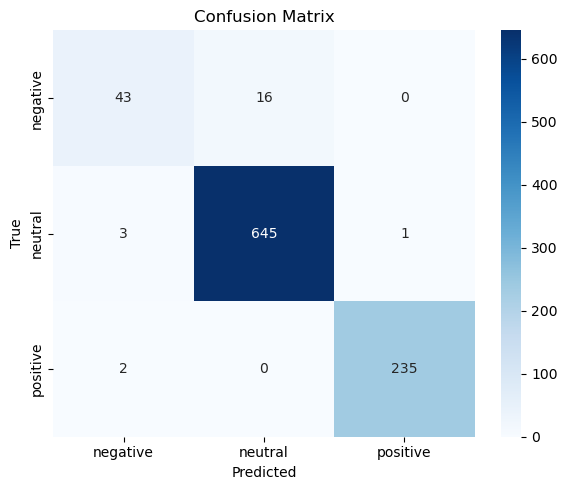

In [165]:
from sklearn.metrics import confusion_matrix
#!pip install -q seaborn matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot and save
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()

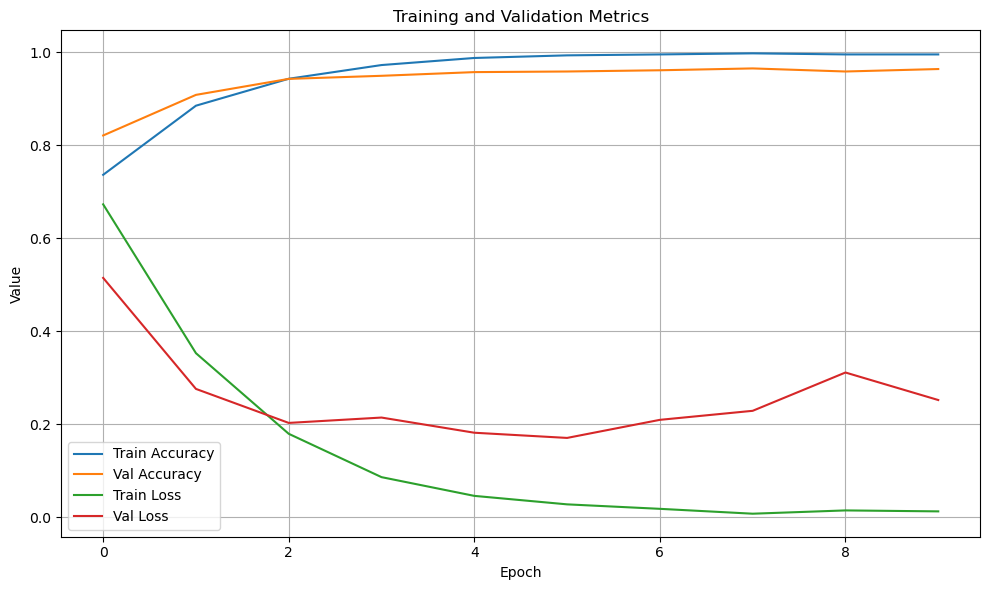

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert training history to DataFrame
history_df = pd.DataFrame(history.history)

# Plot all in one figure
plt.figure(figsize=(10, 6))

# Accuracy
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Val Accuracy')

# Loss
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Val Loss')

plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

# FinBERT

In [167]:
#!pip install -q scikit-learn datasets torch transformers evaluate optuna

In [168]:
#!pip install "numpy<2.0.0"

In [169]:
# Step 1: Import Libraries

import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from datasets import Dataset, DatasetDict
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    EarlyStoppingCallback
)
import evaluate
import warnings
warnings.filterwarnings("ignore")

# Step 2: Load the dataset
df = pd.read_csv("Dataset/Cleaned Sentence Data/Cleaned Annual Reports.csv")  # Replace with your dataset path
assert 'Sentence' in df.columns and 'Sentiment' in df.columns, "CSV must have 'Sentence' and 'Sentiment' columns"

# Step 3: Encode labels if needed
if df['Sentiment'].dtype == object:
    le = LabelEncoder()
    df['Sentiment'] = le.fit_transform(df['Sentiment'])  # Save le.classes_ if needed for decoding

# Step 4: Convert to Hugging Face Dataset and split
dataset = Dataset.from_pandas(df)
dataset = dataset.train_test_split(test_size=0.3, seed=42)
temp = dataset["test"].train_test_split(test_size=0.5, seed=42)

dataset = DatasetDict({
    'train': dataset['train'],
    'validation': temp['train'],
    'test': temp['test']
})

train_dataset = dataset["train"]
val_dataset = dataset["validation"]
test_dataset = dataset["test"]

# Step 5: Tokenization
model_name = "yiyanghkust/finbert-tone"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize(batch):
    return tokenizer(batch['Sentence'], truncation=True, padding='max_length', max_length=128)

train_dataset = train_dataset.map(tokenize, batched=True)
val_dataset = val_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

# Remove non-numeric columns
for d in [train_dataset, val_dataset, test_dataset]:
    if '__index_level_0__' in d.column_names:
        d = d.remove_columns(['Sentence', '__index_level_0__'])
    else:
        d = d.remove_columns(['Sentence'])


train_dataset = train_dataset.rename_column("Sentiment", "labels")
val_dataset = val_dataset.rename_column("Sentiment", "labels")
test_dataset = test_dataset.rename_column("Sentiment", "labels")

train_dataset = train_dataset.with_format("torch", columns=['input_ids', 'token_type_ids', 'attention_mask', 'labels'])
val_dataset = val_dataset.with_format("torch", columns=['input_ids', 'token_type_ids', 'attention_mask', 'labels'])
test_dataset = test_dataset.with_format("torch", columns=['input_ids', 'token_type_ids', 'attention_mask', 'labels'])


# Step 6: Load FinBERT model
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(df['Sentiment'].unique())
)


# Load F1 metric (can also add accuracy if desired)
f1_metric = evaluate.load("f1")
accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    
    f1 = f1_metric.compute(predictions=preds, references=labels, average="weighted")
    accuracy = accuracy_metric.compute(predictions=preds, references=labels)
    
    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"]
    }

def model_init():
    return AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=len(df['Sentiment'].unique())
    )

def hp_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32]),
        "weight_decay": trial.suggest_float("weight_decay", 0.0, 0.1),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 3, 10),
    }

# Step 7: Define training arguments
training_args = TrainingArguments(
    output_dir="Natural Language Processing/Models/optimized_finbert_sentiment",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=20,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True
)

# Step 8: Initialize Trainer with early stopping
trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)]  # stops after 5 epochs with no improvement
)

best_run = trainer.hyperparameter_search(
    direction="maximize",
    backend="optuna",
    n_trials=10,  # increase for more thorough search
    hp_space=hp_space,
    compute_objective=lambda metrics: metrics["eval_f1"]
)

best_args = training_args

# Update args with best values
best_args.learning_rate = best_run.hyperparameters["learning_rate"]
best_args.per_device_train_batch_size = best_run.hyperparameters["per_device_train_batch_size"]
best_args.weight_decay = best_run.hyperparameters["weight_decay"]
best_args.num_train_epochs = best_run.hyperparameters["num_train_epochs"]

# Recreate Trainer with best config
trainer = Trainer(
    model_init=model_init,
    args=best_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)]
)

# Step 9: Train
trainer.train()

# Step 10: Save the best model
#trainer.save_model("Natural Language Processing/Models/final_finbert_model")
history = trainer.state.log_history
history_df = pd.DataFrame(history)
#history_df.to_csv("Natural Language Processing/Models/training_history.csv", index=False)

#tokenizer.save_pretrained("Natural Language Processing/Models/final_finbert_model")

# Step 11: Evaluate
preds_output = trainer.predict(test_dataset)
pred_labels = np.argmax(preds_output.predictions, axis=1)
true_labels = preds_output.label_ids

report = classification_report(true_labels, pred_labels, target_names=le.classes_, digits=4)
print(report)

Map:   0%|          | 0/3305 [00:00<?, ? examples/s]

Map:   0%|          | 0/708 [00:00<?, ? examples/s]

Map:   0%|          | 0/709 [00:00<?, ? examples/s]

[I 2025-05-27 15:24:32,059] A new study created in memory with name: no-name-4c8f5b91-c425-47ed-86e8-d5a76c1a296c


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.084600,0.207539,0.960452,0.959269
2,0.001500,0.142235,0.980226,0.980084
3,0.070800,0.130808,0.980226,0.980151
4,0.035700,0.133791,0.983051,0.983006


[I 2025-05-27 15:25:26,846] Trial 0 finished with value: 0.9830055622163502 and parameters: {'learning_rate': 2.0717736410196574e-05, 'per_device_train_batch_size': 8, 'weight_decay': 0.08398293352366554, 'num_train_epochs': 4}. Best is trial 0 with value: 0.9830055622163502.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.196900,0.236904,0.957627,0.954615
2,0.018800,0.148233,0.983051,0.982789
3,0.000000,0.085035,0.988701,0.988500
4,0.000000,0.089909,0.988701,0.988588
5,0.000000,0.108013,0.985876,0.985763
6,0.000000,0.110036,0.985876,0.985763
7,0.000000,0.110805,0.985876,0.985763
8,0.000000,0.111588,0.985876,0.985763
9,0.000000,0.112022,0.985876,0.985763


[I 2025-05-27 15:26:58,687] Trial 1 finished with value: 0.9857630000959202 and parameters: {'learning_rate': 4.689964487330154e-05, 'per_device_train_batch_size': 16, 'weight_decay': 0.04689294541037068, 'num_train_epochs': 10}. Best is trial 1 with value: 0.9857630000959202.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.357000,0.288364,0.906780,0.903432
2,0.018100,0.161015,0.966102,0.965361
3,0.014600,0.120387,0.980226,0.980120
4,0.000200,0.136932,0.977401,0.977000
5,0.000100,0.148425,0.978814,0.978381
6,0.000000,0.142561,0.977401,0.977102


[I 2025-05-27 15:28:01,184] Trial 2 finished with value: 0.9771017601375069 and parameters: {'learning_rate': 1.815741523664653e-05, 'per_device_train_batch_size': 16, 'weight_decay': 0.07477322251207177, 'num_train_epochs': 6}. Best is trial 1 with value: 0.9857630000959202.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.275100,0.191370,0.940678,0.940123
2,0.030400,0.088518,0.984463,0.984323
3,0.002600,0.134710,0.985876,0.985763
4,0.000000,0.138586,0.984463,0.984377
5,0.000000,0.141292,0.983051,0.982904


[I 2025-05-27 15:28:53,552] Trial 3 finished with value: 0.9829040666552401 and parameters: {'learning_rate': 2.6312558633680497e-05, 'per_device_train_batch_size': 16, 'weight_decay': 0.05155062754208929, 'num_train_epochs': 5}. Best is trial 1 with value: 0.9857630000959202.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.344500,0.266310,0.906780,0.903704
2,0.022300,0.129639,0.973164,0.973028
3,0.011600,0.138760,0.977401,0.977456
4,0.000000,0.137520,0.980226,0.980226
5,0.001400,0.143483,0.975989,0.976108
6,0.000000,0.141201,0.984463,0.984291
7,0.000000,0.148102,0.981638,0.981592
8,0.000000,0.135622,0.983051,0.983006
9,0.000000,0.136327,0.983051,0.983006
10,0.000000,0.136475,0.983051,0.983006


[I 2025-05-27 15:30:36,644] Trial 4 finished with value: 0.9830055622163502 and parameters: {'learning_rate': 1.9332181011382214e-05, 'per_device_train_batch_size': 16, 'weight_decay': 0.07488029311622313, 'num_train_epochs': 10}. Best is trial 1 with value: 0.9857630000959202.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.529900,0.516362,0.802260,0.789091
2,0.304200,0.382414,0.860169,0.851401
3,0.169500,0.320561,0.896893,0.888283
4,0.110900,0.261057,0.919492,0.917342
5,0.067500,0.249583,0.925141,0.921775


[I 2025-05-27 15:31:22,689] Trial 5 finished with value: 0.9217753910997957 and parameters: {'learning_rate': 1.0320346071185226e-05, 'per_device_train_batch_size': 32, 'weight_decay': 0.04967738445567315, 'num_train_epochs': 5}. Best is trial 1 with value: 0.9857630000959202.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.422700,0.374463,0.861582,0.851633
2,0.170100,0.227644,0.932203,0.929251
3,0.026400,0.170816,0.954802,0.952774
4,0.024500,0.160634,0.959040,0.957581


[I 2025-05-27 15:32:01,584] Trial 6 finished with value: 0.9575805012471862 and parameters: {'learning_rate': 2.0709314207965467e-05, 'per_device_train_batch_size': 32, 'weight_decay': 0.026769852664342366, 'num_train_epochs': 4}. Best is trial 1 with value: 0.9857630000959202.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.240100,0.159856,0.971751,0.971504


[I 2025-05-27 15:32:15,201] Trial 7 pruned. 


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.247900,0.230572,0.939266,0.937658


[I 2025-05-27 15:32:28,624] Trial 8 pruned. 


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.209900,0.143028,0.963277,0.962273
2,0.024800,0.110735,0.980226,0.980179
3,0.000500,0.143396,0.980226,0.980229


[I 2025-05-27 15:33:00,003] Trial 9 pruned. 


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.196900,0.236904,0.957627,0.954615
2,0.018800,0.148233,0.983051,0.982789
3,0.000000,0.085035,0.988701,0.988500
4,0.000000,0.089909,0.988701,0.988588
5,0.000000,0.108013,0.985876,0.985763
6,0.000000,0.110036,0.985876,0.985763
7,0.000000,0.110805,0.985876,0.985763
8,0.000000,0.111588,0.985876,0.985763
9,0.000000,0.112022,0.985876,0.985763


              precision    recall  f1-score   support

    negative     1.0000    1.0000    1.0000        40
     neutral     1.0000    0.9959    0.9980       489
    positive     0.9890    1.0000    0.9945       180

    accuracy                         0.9972       709
   macro avg     0.9963    0.9986    0.9975       709
weighted avg     0.9972    0.9972    0.9972       709



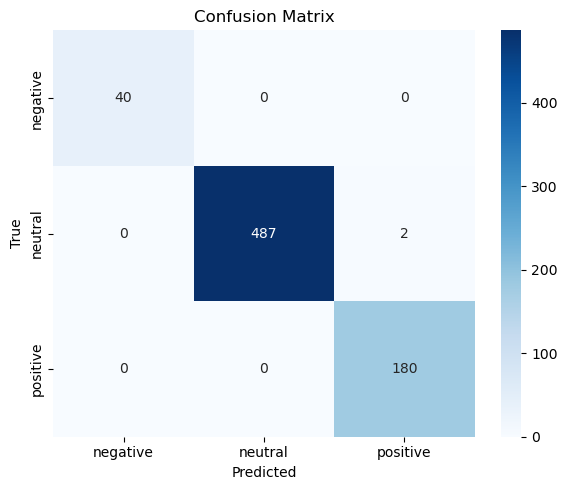

In [170]:
from sklearn.metrics import confusion_matrix
#!pip install -q seaborn matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()

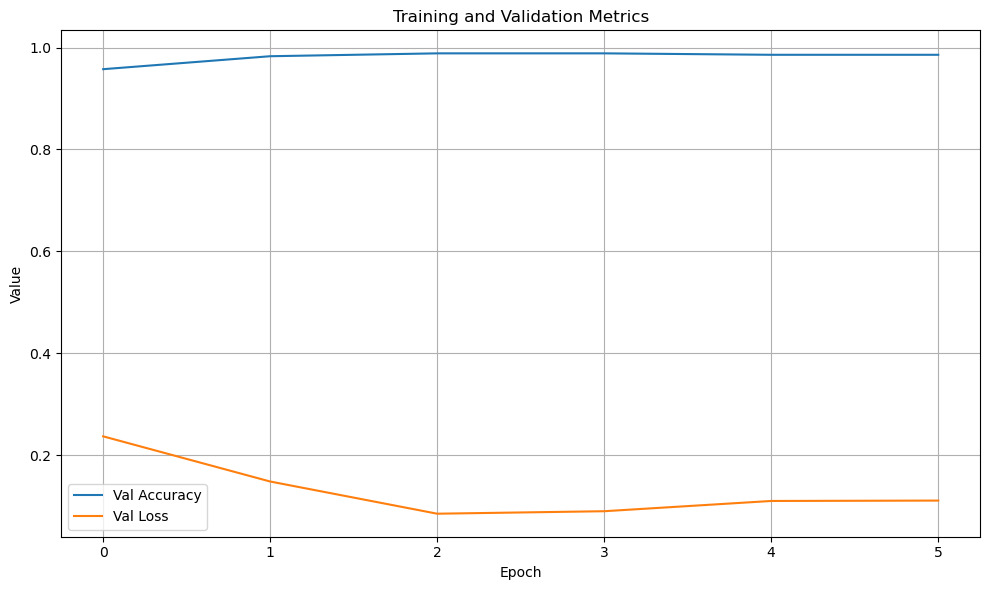

In [171]:
# Convert training history to DataFrame
# Plot all in one figure

epochs_list = [1, 2, 3, 4, 5, 6, 7]

train_history = history_df[history_df["epoch"].isin(epochs_list)]
index_to_drop = train_history[train_history["epoch"] == 5].index[0]
train_history = train_history.drop(index_to_drop).reset_index(drop=True)

plt.figure(figsize=(10, 6))

# Accuracy
#plt.plot(train_history['eval_f1'], label='Val F1 Score')
plt.plot(train_history['eval_accuracy'], label='Val Accuracy')

# Loss
#plt.plot(history_df['loss'], label='Train Loss')
plt.plot(train_history['eval_loss'], label='Val Loss')

plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()